<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span></li></ul></div>

# Восстановление золота из руды

Подготовим прототип модели машинного обучения для компании, которая разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используем данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Нам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

## Подготовка данных

1.1. Откроем и изучим файлы

Загрузим библиотеки

In [1]:
import pandas as pd
from sklearn.metrics import mean_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import randint as sp_randInt
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.dummy import DummyRegressor

In [2]:
try:
    data_train = pd.read_csv('/datasets/gold_recovery_train_new.csv')
except:
    data_train = pd.read_csv('https://code.s3.yandex.net/datasets/gold_recovery_train_new.csv')

In [3]:
data_train.head(10)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
5,2016-01-15 05:00:00,6.482968,10.049416,5.480257,41.633678,69.465816,10.182708,0.664118,16.999638,1.918586,...,13.938497,-500.970168,11.883350,-500.395298,10.054147,-496.374715,7.965083,-499.364752,14.017067,-599.707915
6,2016-01-15 06:00:00,6.533849,10.058141,4.569100,41.995316,69.300835,10.304598,0.807342,16.723575,2.058913,...,14.046819,-500.971133,12.091543,-500.501426,10.003247,-497.083180,8.010890,-500.002423,14.029649,-600.905470
7,2016-01-15 07:00:00,6.130823,9.935481,4.389813,42.452727,70.230976,10.443288,0.949346,16.689959,2.143437,...,13.974691,-501.819696,12.101324,-500.583446,9.873169,-499.171928,7.993381,-499.794518,13.984498,-600.411070
8,2016-01-15 08:00:00,5.834140,10.071156,4.876389,43.404078,69.688595,10.420140,1.065453,17.201948,2.209881,...,13.964030,-504.252450,12.060738,-501.174549,10.033838,-501.178133,7.881604,-499.729434,13.967135,-599.061188
9,2016-01-15 09:00:00,5.687063,9.980404,5.282514,43.235220,70.279619,10.487013,1.159805,17.483979,2.209593,...,13.989632,-503.195299,12.052233,-500.928547,9.962574,-502.986357,7.979219,-500.146835,13.981614,-598.070855


In [4]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


In [5]:
data_train.describe()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,14148.000000,14148.000000,13938.000000,14149.000000,14149.000000,14149.000000,14049.000000,14144.000000,14149.000000,14129.000000,...,14143.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14147.000000,14148.000000
mean,5.142034,10.132960,9.202849,44.003792,66.518832,9.607035,2.597298,10.512122,2.918421,133.320659,...,19.985454,-478.696836,15.487065,-460.229416,16.775136,-483.956022,13.064590,-483.966564,19.577539,-506.798480
std,1.369586,1.654930,2.790516,4.905261,10.295402,2.319069,0.971843,3.003617,0.903712,39.431659,...,5.657723,50.736021,5.255655,58.843586,5.831906,37.892788,5.765617,39.207913,5.764417,37.079249
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003112,...,0.000000,-799.709069,0.000000,-799.889113,-0.372054,-797.142475,0.646208,-800.006180,0.195324,-809.398668
25%,4.211620,9.297355,7.484645,43.276111,62.545817,7.997429,1.905973,8.811324,2.368607,107.006651,...,14.990775,-500.628656,11.894558,-500.149000,11.083980,-500.363177,8.994405,-500.105994,14.989304,-500.745104
50%,4.994652,10.297144,8.845462,44.872436,67.432775,9.480270,2.592022,10.514621,2.851025,133.018328,...,20.001789,-499.681450,14.975536,-499.388738,17.932223,-499.702452,11.997547,-499.914556,19.984175,-500.061431
75%,5.859540,11.170603,10.487508,46.166425,72.346428,11.003707,3.241723,11.933009,3.434764,159.825396,...,24.990826,-477.472413,20.059375,-400.039008,21.346550,-487.712108,17.982903,-453.186936,24.991623,-499.536466
max,16.001945,17.031899,18.124851,52.756638,100.000000,19.552149,5.639565,22.317730,8.197408,250.127834,...,30.115735,-245.239184,24.007913,-145.071088,43.709931,-275.073125,27.926001,-157.396071,32.188906,-104.427459


In [6]:
data_train.isna().sum()

date                                            0
final.output.concentrate_ag                     1
final.output.concentrate_pb                     1
final.output.concentrate_sol                  211
final.output.concentrate_au                     0
                                             ... 
secondary_cleaner.state.floatbank5_a_level      1
secondary_cleaner.state.floatbank5_b_air        1
secondary_cleaner.state.floatbank5_b_level      1
secondary_cleaner.state.floatbank6_a_air        2
secondary_cleaner.state.floatbank6_a_level      1
Length: 87, dtype: int64

In [7]:
try:
    data_test = pd.read_csv('/datasets/gold_recovery_test_new.csv')
except:
    data_test = pd.read_csv('https://code.s3.yandex.net/datasets/gold_recovery_test_new.csv')

In [8]:
data_test.head(10)

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333
5,2016-09-01 05:59:59,168.485085,8.817007,7.420000,0.791191,1402.826803,-499.299521,1401.511119,-499.205357,1404.088107,...,12.029797,-499.814895,8.036586,-500.371492,8.041446,-510.037054,4.983949,-499.990990,24.978973,-500.475640
6,2016-09-01 06:59:59,144.133440,7.924610,7.420000,0.788838,1398.252401,-499.748672,1393.255503,-499.195380,1396.738566,...,12.026296,-499.473127,8.027984,-500.983079,7.907340,-507.964971,5.010224,-500.043697,25.040709,-499.501984
7,2016-09-01 07:59:59,133.513396,8.055252,6.988000,0.801871,1401.669677,-501.777839,1400.754446,-502.514024,1400.465244,...,12.040911,-501.293852,8.020490,-499.185229,8.116897,-511.927561,5.036498,-500.149615,25.032580,-503.970657
8,2016-09-01 08:59:59,133.735356,7.999618,6.935000,0.789329,1402.358981,-499.981597,1400.985954,-496.802968,1401.168584,...,11.998184,-499.481608,8.012610,-500.896783,7.974422,-521.199104,5.061599,-499.791519,25.005063,-497.613716
9,2016-09-01 09:59:59,126.961069,8.017856,7.030000,0.805298,1400.816120,-499.014158,1399.975401,-499.570552,1401.871924,...,12.040725,-499.987743,7.989503,-499.750625,7.989710,-509.946737,5.068811,-499.293900,24.992741,-499.272255


In [9]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

In [10]:
data_test.describe()

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,5286.000000,5285.000000,5290.000000,5286.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,...,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000
mean,174.839652,8.683596,7.266339,1.383803,1.539494e+03,-497.665883,1.545174e+03,-500.273098,1.527272e+03,-498.330680,...,1.632007e+01,-505.144570,1.373544e+01,-463.349858,12.804186,-501.329122,9.881145,-495.663398,17.304935,-501.793193
std,43.027080,3.072050,0.610219,0.643474,1.167979e+02,19.952431,1.222246e+02,32.968307,1.225380e+02,21.964876,...,3.493583e+00,31.427337,3.430484e+00,86.189107,3.026591,17.951495,2.868205,34.535007,4.536544,39.044215
min,2.566156,0.003839,5.650000,0.004984,5.445860e-32,-795.316337,6.647490e-32,-799.997015,4.033736e-32,-799.960571,...,1.079872e-16,-799.798523,2.489718e-17,-800.836914,0.069227,-797.323986,0.528083,-800.220337,-0.079426,-809.741464
25%,147.121401,6.489555,6.890000,0.907623,1.498936e+03,-500.357298,1.498971e+03,-500.703002,1.473230e+03,-501.018117,...,1.403618e+01,-500.868258,1.202862e+01,-500.323028,10.914838,-500.726841,8.036719,-500.194668,13.997317,-500.690984
50%,177.828489,8.052207,7.250000,1.197610,1.585129e+03,-499.969164,1.595622e+03,-500.028514,1.549595e+03,-500.017711,...,1.700847e+01,-500.115727,1.496486e+01,-499.576513,12.954182,-499.990332,10.004301,-499.990535,16.014935,-500.007126
75%,208.125438,10.027764,7.600000,1.797819,1.602077e+03,-499.568951,1.602324e+03,-499.293257,1.601144e+03,-498.994130,...,1.803862e+01,-499.404224,1.596213e+01,-400.933805,15.097528,-499.283191,11.997467,-499.719913,21.020013,-499.373018
max,265.983123,40.000000,15.500000,4.102454,2.103104e+03,-57.195404,1.813084e+03,-142.527229,1.715054e+03,-150.937035,...,3.005180e+01,-401.565212,3.126971e+01,-6.506986,25.258848,-244.483566,14.086866,-137.740004,26.705889,-123.307487


In [11]:
data_test.isna().sum()

date                                           0
primary_cleaner.input.sulfate                  4
primary_cleaner.input.depressant               5
primary_cleaner.input.feed_size                0
primary_cleaner.input.xanthate                 4
primary_cleaner.state.floatbank8_a_air         0
primary_cleaner.state.floatbank8_a_level       0
primary_cleaner.state.floatbank8_b_air         0
primary_cleaner.state.floatbank8_b_level       0
primary_cleaner.state.floatbank8_c_air         0
primary_cleaner.state.floatbank8_c_level       0
primary_cleaner.state.floatbank8_d_air         0
primary_cleaner.state.floatbank8_d_level       0
rougher.input.feed_ag                          0
rougher.input.feed_pb                          0
rougher.input.feed_rate                        3
rougher.input.feed_size                        1
rougher.input.feed_sol                        21
rougher.input.feed_au                          0
rougher.input.floatbank10_sulfate              5
rougher.input.floatb

In [12]:
try:
    data_full = pd.read_csv('/datasets/gold_recovery_full_new.csv')
except:
    data_full = pd.read_csv('https://code.s3.yandex.net/datasets/gold_recovery_full_new.csv')

In [13]:
data_full.head(10)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
5,2016-01-15 05:00:00,6.482968,10.049416,5.480257,41.633678,69.465816,10.182708,0.664118,16.999638,1.918586,...,13.938497,-500.970168,11.883350,-500.395298,10.054147,-496.374715,7.965083,-499.364752,14.017067,-599.707915
6,2016-01-15 06:00:00,6.533849,10.058141,4.569100,41.995316,69.300835,10.304598,0.807342,16.723575,2.058913,...,14.046819,-500.971133,12.091543,-500.501426,10.003247,-497.083180,8.010890,-500.002423,14.029649,-600.905470
7,2016-01-15 07:00:00,6.130823,9.935481,4.389813,42.452727,70.230976,10.443288,0.949346,16.689959,2.143437,...,13.974691,-501.819696,12.101324,-500.583446,9.873169,-499.171928,7.993381,-499.794518,13.984498,-600.411070
8,2016-01-15 08:00:00,5.834140,10.071156,4.876389,43.404078,69.688595,10.420140,1.065453,17.201948,2.209881,...,13.964030,-504.252450,12.060738,-501.174549,10.033838,-501.178133,7.881604,-499.729434,13.967135,-599.061188
9,2016-01-15 09:00:00,5.687063,9.980404,5.282514,43.235220,70.279619,10.487013,1.159805,17.483979,2.209593,...,13.989632,-503.195299,12.052233,-500.928547,9.962574,-502.986357,7.979219,-500.146835,13.981614,-598.070855


In [14]:
data_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


In [15]:
data_full.describe()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,19438.000000,19438.000000,19228.000000,19439.000000,19439.000000,19438.000000,19338.000000,19433.000000,19439.000000,19415.000000,...,19433.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19437.000000,19438.000000
mean,5.168470,9.978895,9.501224,44.076513,67.050208,9.688589,2.705795,10.583728,3.042467,144.624774,...,18.987674,-485.894516,15.010366,-461.078636,15.694452,-488.684065,12.198224,-487.149827,18.959024,-505.436305
std,1.372348,1.669240,2.787537,5.129784,10.125840,2.328642,0.949077,2.868782,0.922808,44.464071,...,5.411058,47.758570,4.890228,67.405524,5.510974,34.533396,5.333024,38.347312,5.550498,37.689057
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003112,...,0.000000,-799.798523,0.000000,-800.836914,-0.372054,-797.323986,0.528083,-800.220337,-0.079426,-809.741464
25%,4.251240,9.137262,7.722820,43.402215,63.299712,8.062878,2.040119,8.938947,2.461138,114.107029,...,14.975734,-500.704892,11.940294,-500.187742,10.988606,-500.458467,8.971105,-500.129462,14.983037,-500.728067
50%,5.066094,10.102433,9.218961,45.011244,68.172738,9.743623,2.748730,10.622456,2.984909,143.232103,...,18.017481,-499.837793,14.971014,-499.459786,15.000036,-499.802605,11.019433,-499.935317,19.960541,-500.048400
75%,5.895527,11.035769,10.947813,46.275313,72.686642,11.134294,3.333216,12.104271,3.571351,175.075656,...,23.012470,-498.249730,19.034162,-400.118106,18.026190,-498.384187,14.019088,-499.436708,24.003170,-499.495378
max,16.001945,17.031899,19.615720,52.756638,100.000000,19.552149,5.804178,22.317730,8.245022,265.983123,...,30.115735,-245.239184,31.269706,-6.506986,43.709931,-244.483566,27.926001,-137.740004,32.188906,-104.427459


In [16]:
data_full.isna().sum()

date                                            0
final.output.concentrate_ag                     1
final.output.concentrate_pb                     1
final.output.concentrate_sol                  211
final.output.concentrate_au                     0
                                             ... 
secondary_cleaner.state.floatbank5_a_level      1
secondary_cleaner.state.floatbank5_b_air        1
secondary_cleaner.state.floatbank5_b_level      1
secondary_cleaner.state.floatbank6_a_air        2
secondary_cleaner.state.floatbank6_a_level      1
Length: 87, dtype: int64

Вывод: открыли файлы, посмотрели общую информацию и часть датафреймов, посмотрели информацию методом describe, посмотрели пропуски в данных 

1.2. Проверим, что эффективность обогащения рассчитана правильно. Вычислим её на обучающей выборке для признака rougher.output.recovery. Найдем MAE между вашими расчётами и значением признака. Опишем выводы.

In [17]:
data_train['rougher.output.recovery']

0        87.107763
1        86.843261
2        86.842308
3        87.226430
4        86.688794
           ...    
14144    89.574376
14145    87.724007
14146    88.890579
14147    89.858126
14148    89.514960
Name: rougher.output.recovery, Length: 14149, dtype: float64

In [18]:
recovery_check = ((data_train['rougher.output.concentrate_au']*(data_train['rougher.input.feed_au']-data_train['rougher.output.tail_au'])/(data_train['rougher.input.feed_au']*(data_train['rougher.output.concentrate_au']-data_train['rougher.output.tail_au']))))*100

In [19]:
round(mean_absolute_error(data_train['rougher.output.recovery'], recovery_check))

0

Вывод: расчет в датафрейме верный

1.3. Проанализируем признаки, недоступные в тестовой выборке. Напишем в выводе, что это за параметры и какому типу они относятся.

In [20]:
print(data_train.columns.difference(data_test.columns))

Index(['final.output.concentrate_ag', 'final.output.concentrate_au',
       'final.output.concentrate_pb', 'final.output.concentrate_sol',
       'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_au',
       'final.output.tail_pb', 'final.output.tail_sol',
       'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_au',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol',
       'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_au',
       'primary_cleaner.output.tail_pb', 'primary_cleaner.output.tail_sol',
       'rougher.calculation.au_pb_ratio',
       'rougher.calculation.floatbank10_sulfate_to_au_feed',
       'rougher.calculation.floatbank11_sulfate_to_au_feed',
       'rougher.calculation.sulfate_to_au_concentrate',
       'rougher.output.concentrate_ag', 'rougher.output.concentrate_au',
       'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol',
       'roughe

Вывод: в тестовых данных отсутствуют параметры продукта после флотации и в отвальных хвостах, расчеты параметров этапа флотации, параметры продукта после первичной очистки и в отвальных хвостах, параметры после вторичной очистки в отвальных хвостах, финальные параметры в отвальных хвостах. 

1.4. Проведем предобработку данных.

Начнем предобработку данных с обучающих данных

При изучении данных мы видели, что есть пропуски, поработаем с ними, заполнив их значениями из предыдущих строк

In [21]:
data_train.ffill(axis=0, inplace=True)

Проверим

In [22]:
data_train.isna().sum()

date                                          0
final.output.concentrate_ag                   0
final.output.concentrate_pb                   0
final.output.concentrate_sol                  0
final.output.concentrate_au                   0
                                             ..
secondary_cleaner.state.floatbank5_a_level    0
secondary_cleaner.state.floatbank5_b_air      0
secondary_cleaner.state.floatbank5_b_level    0
secondary_cleaner.state.floatbank6_a_air      0
secondary_cleaner.state.floatbank6_a_level    0
Length: 87, dtype: int64

Проверим дубликаты

In [23]:
data_train.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
14144    False
14145    False
14146    False
14147    False
14148    False
Length: 14149, dtype: bool

Предобработка тестовых данных

Уберем пропуски, заменив их предыдущими значениями

In [24]:
data_test.ffill(axis=0, inplace=True)

Проверим

In [25]:
data_test.isna().sum()

date                                          0
primary_cleaner.input.sulfate                 0
primary_cleaner.input.depressant              0
primary_cleaner.input.feed_size               0
primary_cleaner.input.xanthate                0
primary_cleaner.state.floatbank8_a_air        0
primary_cleaner.state.floatbank8_a_level      0
primary_cleaner.state.floatbank8_b_air        0
primary_cleaner.state.floatbank8_b_level      0
primary_cleaner.state.floatbank8_c_air        0
primary_cleaner.state.floatbank8_c_level      0
primary_cleaner.state.floatbank8_d_air        0
primary_cleaner.state.floatbank8_d_level      0
rougher.input.feed_ag                         0
rougher.input.feed_pb                         0
rougher.input.feed_rate                       0
rougher.input.feed_size                       0
rougher.input.feed_sol                        0
rougher.input.feed_au                         0
rougher.input.floatbank10_sulfate             0
rougher.input.floatbank10_xanthate      

Проверим дубликаты

In [26]:
data_test.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
5285    False
5286    False
5287    False
5288    False
5289    False
Length: 5290, dtype: bool

Вывод: проверили предобработку, заполнили пропуски, проверили дубликаты, посмотрели на графиках данные, имются разные данные и распределения

## Анализ данных

2.1. Посмотрите, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки. Опишите выводы.

Для таблицы над понадобятся определенные столбцы, для удобства выведем их.

In [27]:
print(data_train.columns)

Index(['date', 'final.output.concentrate_ag', 'final.output.concentrate_pb',
       'final.output.concentrate_sol', 'final.output.concentrate_au',
       'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_pb',
       'final.output.tail_sol', 'final.output.tail_au',
       'primary_cleaner.input.sulfate', 'primary_cleaner.input.depressant',
       'primary_cleaner.input.feed_size', 'primary_cleaner.input.xanthate',
       'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol',
       'primary_cleaner.output.concentrate_au',
       'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_pb',
       'primary_cleaner.output.tail_sol', 'primary_cleaner.output.tail_au',
       'primary_cleaner.state.floatbank8_a_air',
       'primary_cleaner.state.floatbank8_a_level',
       'primary_cleaner.state.floatbank8_b_air',
       'primary_cleaner.state.floatbank8_b_level',
       'primary_clean

In [28]:
columns = ['этап', 'золото', 'серебро', 'свинец']
concentrate = pd.DataFrame(data=None, columns=columns)
concentrate.loc[0] = ['Перед флотацией',data_train['rougher.input.feed_au'].mean(), data_train['rougher.input.feed_ag'].mean(), data_train['rougher.input.feed_pb'].mean()]
concentrate.loc[1] =['После флотации', data_train['rougher.output.concentrate_au'].mean(), data_train['rougher.output.concentrate_ag'].mean(), data_train['rougher.output.concentrate_pb'].mean()]
concentrate.loc[2] =['Первичная очистка', data_train['primary_cleaner.output.concentrate_au'].mean(), data_train['primary_cleaner.output.concentrate_ag'].mean(), data_train['primary_cleaner.output.concentrate_pb'].mean()]
concentrate.loc[3] =['Вторичная очистка', data_train['final.output.concentrate_au'].mean(), data_train['final.output.concentrate_ag'].mean(), data_train['final.output.concentrate_pb'].mean()]

concentrate

,этап,золото,серебро,свинец
0,Перед флотацией,7.866577,8.579195,3.505465
1,После флотации,19.439958,11.775812,7.664555
2,Первичная очистка,32.386836,8.200916,9.568544
3,Вторичная очистка,44.003792,5.141921,10.132848


Вывод: концентрация золота с очисткой увеличилась, также присутсвуют примесь серебра и свинца, но в меньшей мере.

In [29]:
def metal_data(a,b,c,d):
    columns = ['Перед флотацией', 'После флотации', 'Первичная очистка', 'Вторичная очистка']
    metal = pd.DataFrame(data=None, columns=columns)
    metal.loc[:,'Перед флотацией'] = a
    metal.loc[:,'После флотации'] = b
    metal.loc[:,'Первичная очистка'] = c
    metal.loc[:,'Вторичная очистка'] = d
    
   
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
    fig.suptitle('Распределение', fontweight ="bold", fontsize = 16)

    fig.set_figwidth(15)
    fig.set_figheight(10)


    ax1.hist(a, bins=25, color='green', edgecolor='blue',
         linestyle='--', alpha=0.5)
    ax2.hist(b, bins=25, color='green', edgecolor='blue',
         linestyle='--', alpha=0.5)
    ax3.hist(c, bins=25, color='green', edgecolor='blue',
         linestyle='--', alpha=0.5)
    ax4.hist(d, bins=25, color='green', edgecolor='blue',
         linestyle='--', alpha=0.5)
    ax1.set_ylim(0, 6000)
    ax2.set_ylim(0, 6000)
    ax3.set_ylim(0, 6000)
    ax4.set_ylim(0, 6000)
    ax1.set(xlabel='Количество наблюдений', ylabel='Концентрация')
    ax2.set(xlabel='Количество наблюдений', ylabel='Концентрация')
    ax3.set(xlabel='Количество наблюдений', ylabel='Концентрация')
    ax4.set(xlabel='Количество наблюдений', ylabel='Концентрация')
    
    ax1.set_title("Перед флотацией", fontweight ="bold")
    ax2.set_title("После флотации", fontweight ="bold")
    ax3.set_title("Первичная очистка", fontweight ="bold")
    ax4.set_title("Вторичная очистка", fontweight ="bold")
    
 
    plt.show()
    
    

Распределение золота


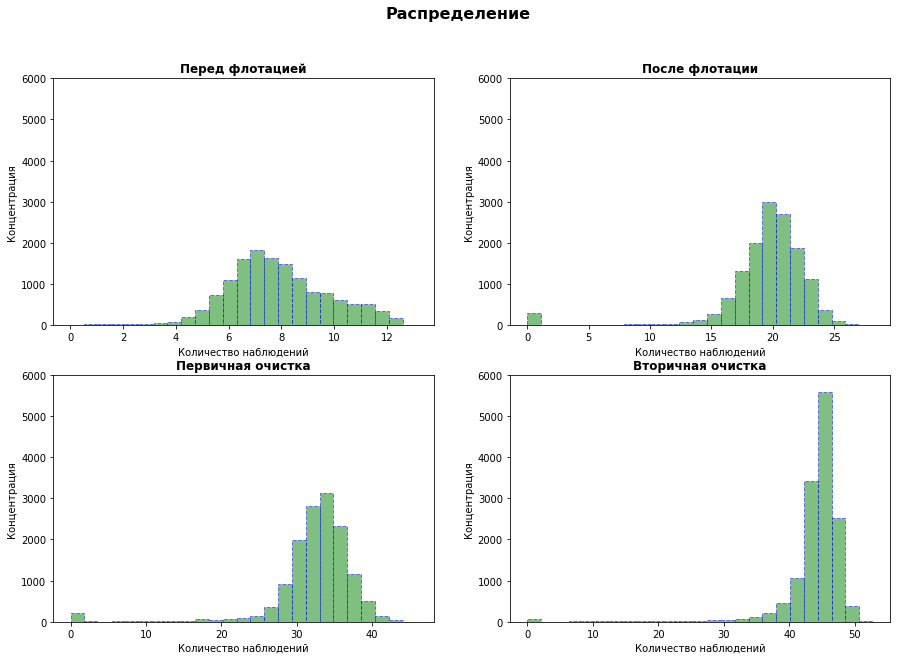

In [30]:
print('Распределение золота')
metal_data(data_train['rougher.input.feed_au'], data_train['rougher.output.concentrate_au'], data_train['primary_cleaner.output.concentrate_au'], data_train['final.output.concentrate_au'])

Распределение серебра


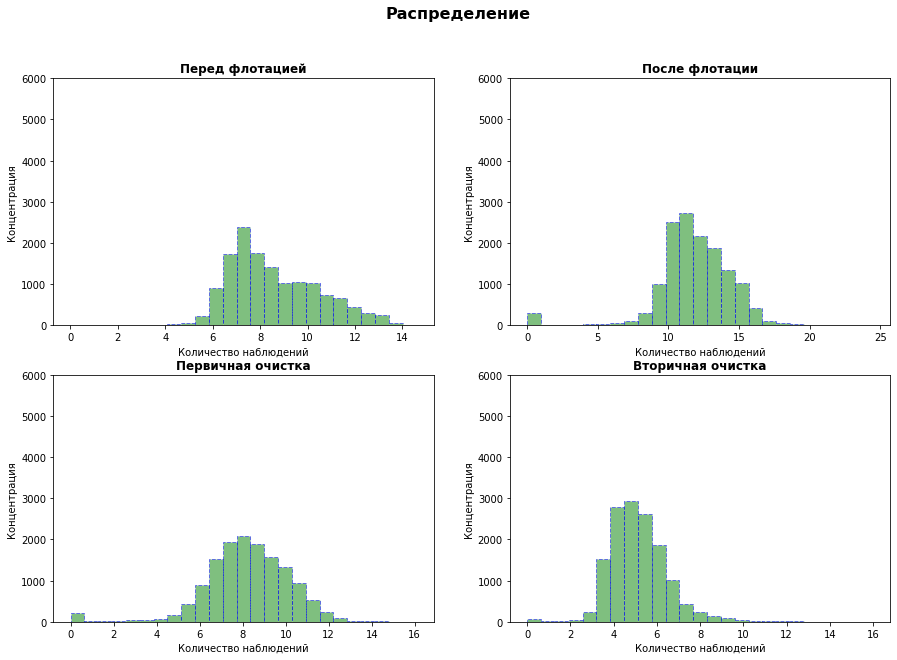

In [31]:
print('Распределение серебра')
metal_data(data_train['rougher.input.feed_ag'], data_train['rougher.output.concentrate_ag'], data_train['primary_cleaner.output.concentrate_ag'], data_train['final.output.concentrate_ag'])

Распределение свинца


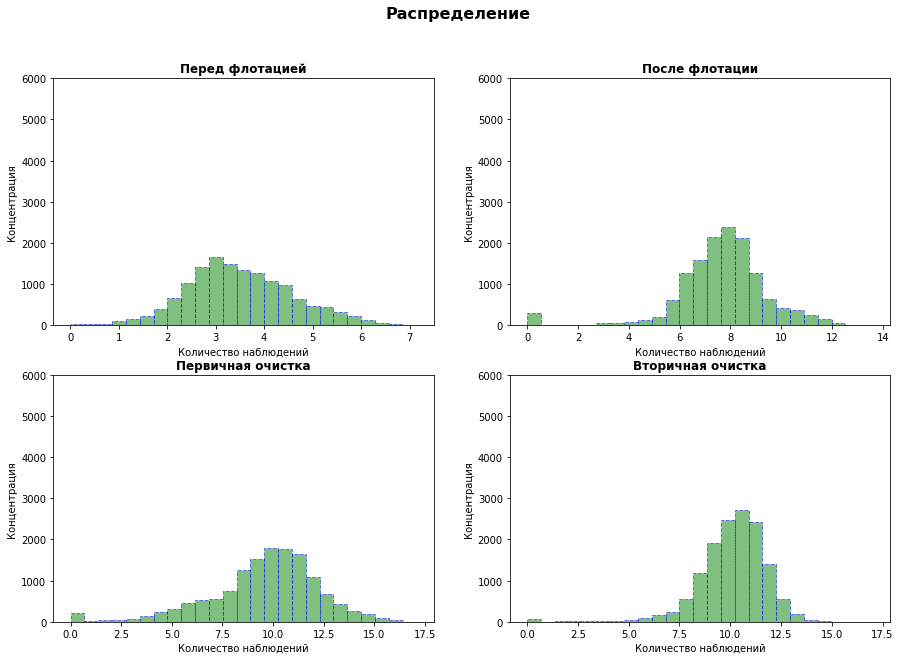

In [32]:
print('Распределение свинца')
metal_data(data_train['rougher.input.feed_pb'], data_train['rougher.output.concentrate_pb'], data_train['primary_cleaner.output.concentrate_pb'], data_train['final.output.concentrate_pb'])

2.2.  Сравните распределения размеров гранул сырья на обучающей и тестовой выборках. Если распределения сильно отличаются друг от друга, оценка модели будет неправильной.

In [33]:
columns = ['этап', 'обучающие данные', 'тестовые данные', 'разница']
feed = pd.DataFrame(data=None, columns=columns)
feed.loc[0] = ['Флотация', data_train['rougher.input.feed_size'].mean(), data_test['rougher.input.feed_size'].mean(), data_train['rougher.input.feed_size'].mean() - data_test['rougher.input.feed_size'].mean()]
feed.loc[1] =['Первичная очистка', data_train['primary_cleaner.input.feed_size'].mean(), data_test['primary_cleaner.input.feed_size'].mean(), data_train['primary_cleaner.input.feed_size'].mean()-data_test['primary_cleaner.input.feed_size'].mean()]

feed

,этап,обучающие данные,тестовые данные,разница
0,Флотация,60.239856,55.952754,4.287102
1,Первичная очистка,7.322310,7.266339,0.055971


Вывод: сравнили данные по размерам гранул сырья, они не сильно различаются

In [34]:
columns = ['обучающие данные', 'тестовые данные']
feed_1 = pd.DataFrame(data=None, columns=columns)
feed_1.loc[:, 'обучающие данные'] = data_train['rougher.input.feed_size']
feed_1.loc[:, 'тестовые данные'] = data_test['rougher.input.feed_size']

feed_1.head(2)

,обучающие данные,тестовые данные
0,55.486599,62.710452
1,57.278666,61.961163


In [35]:
columns = ['обучающие данные', 'тестовые данные']
feed_2 = pd.DataFrame(data=None, columns=columns)
feed_2.loc[:, 'обучающие данные'] = data_train['primary_cleaner.input.feed_size']
feed_2.loc[:, 'тестовые данные'] = data_test['primary_cleaner.input.feed_size']

feed_2.head(2)

,обучающие данные,тестовые данные
0,7.25,8.08
1,7.25,8.08


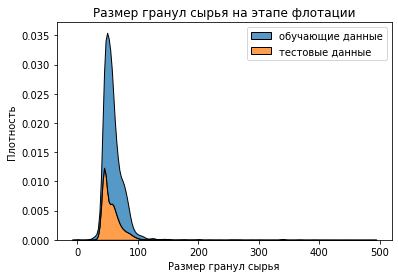

In [36]:
sns.kdeplot(data=feed_1, multiple="stack")
plt.title('Размер гранул сырья на этапе флотации')
plt.ylabel('Плотность')
plt.xlabel('Размер гранул сырья')

plt.show()

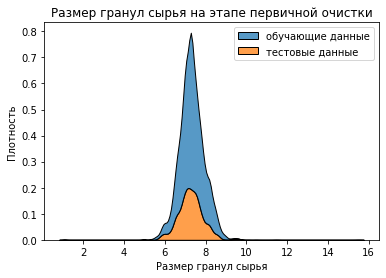

In [37]:
sns.kdeplot(data=feed_2, multiple="stack")
plt.title('Размер гранул сырья на этапе первичной очистки')
plt.ylabel('Плотность')
plt.xlabel('Размер гранул сырья')

plt.show()

2.3. Исследуйте суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.

In [38]:
columns = ['этап', 'суммарная концентрация всех веществ']
materials = pd.DataFrame(data=None, columns=columns)
rougher = round((data_train['rougher.output.concentrate_ag'] + data_train['rougher.output.concentrate_pb'] + data_train['rougher.output.concentrate_sol'] + data_train['rougher.output.concentrate_au']).sum())
primary = round((data_train['primary_cleaner.output.concentrate_ag'] + data_train['primary_cleaner.output.concentrate_pb'] + data_train['primary_cleaner.output.concentrate_sol'] + data_train['primary_cleaner.output.concentrate_au']).sum())
final = round((data_train['final.output.concentrate_ag'] + data_train['final.output.concentrate_pb'] + data_train['final.output.concentrate_sol'] + data_train['final.output.concentrate_au']).sum())
materials.loc[0] = ['Сырье', rougher]
materials.loc[1] =['Черновой концентрат', primary]
materials.loc[2] =['Финальный концентрат', final]
                   
materials


,этап,суммарная концентрация всех веществ
0,Сырье,950433
1,Черновой концентрат,851381
2,Финальный концентрат,967620


Вывод: посмотрели на суммарную концентрацию веществ на разных стадиях

In [39]:
before_rougher = data_train[['rougher.input.feed_ag', 'rougher.input.feed_pb',
                             'rougher.input.feed_sol', 'rougher.input.feed_au']].copy()
rougher = data_train[['rougher.output.concentrate_ag','rougher.output.concentrate_pb',
                      'rougher.output.concentrate_sol','rougher.output.concentrate_au']].copy()
primary = data_train[['primary_cleaner.output.concentrate_ag','primary_cleaner.output.concentrate_pb',
                      'primary_cleaner.output.concentrate_sol','primary_cleaner.output.concentrate_au']].copy()
final = data_train[['final.output.concentrate_ag', 'final.output.concentrate_pb',
                    'final.output.concentrate_sol', 'final.output.concentrate_au']].copy()

In [40]:
before_rougher['total'] = round(data_train['rougher.input.feed_ag'] + data_train['rougher.input.feed_pb'] + data_train['rougher.input.feed_sol'] + data_train['rougher.input.feed_au'])
rougher['total'] = round(data_train['rougher.output.concentrate_ag'] + data_train['rougher.output.concentrate_pb'] + data_train['rougher.output.concentrate_sol'] + data_train['rougher.output.concentrate_au'])
primary['total'] = round(data_train['primary_cleaner.output.concentrate_ag'] + data_train['primary_cleaner.output.concentrate_pb'] + data_train['primary_cleaner.output.concentrate_sol'] + data_train['primary_cleaner.output.concentrate_au'])
final['total'] = round(data_train['final.output.concentrate_ag'] + data_train['final.output.concentrate_pb'] + data_train['final.output.concentrate_sol'] + data_train['final.output.concentrate_au'])
final.head(2)

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,total
0,6.055403,9.889648,5.507324,42.192020,64.0
1,6.029369,9.968944,5.257781,42.701629,64.0


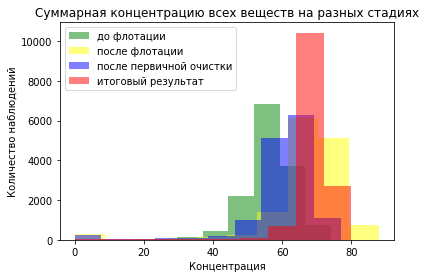

In [41]:
a = before_rougher['total']
b = rougher['total']
c = primary['total']
d = final['total']

plt.hist(a, color='green', alpha=0.5, label='до флотации')
plt.hist(b, color='yellow', alpha=0.5, label='после флотации')
plt.hist(c, color='blue',alpha=0.5, label='после первичной очистки')
plt.hist(d, color='red', alpha=0.5, label='итоговый результат')
plt.legend()
plt.title('Суммарная концентрацию всех веществ на разных стадиях')
plt.ylabel('Количество наблюдений')
plt.xlabel('Концентрация')
plt.show()

Вывод: посмотрели на концентрацию, есть нулевые данные, их нужно удалить

In [42]:
data_train = data_train[data_train['rougher.input.feed_ag'] > 0]
data_train = data_train[data_train['rougher.input.feed_pb'] > 0]
data_train = data_train[data_train['rougher.input.feed_sol'] > 0]
data_train = data_train[data_train['rougher.input.feed_au'] > 0]
data_train = data_train[data_train['rougher.output.concentrate_ag'] > 0]
data_train = data_train[data_train['rougher.output.concentrate_sol'] > 0]
data_train = data_train[data_train['rougher.output.concentrate_au'] > 0]
data_train = data_train[data_train['rougher.output.concentrate_pb'] > 0]


data_train = data_train[data_train['primary_cleaner.output.concentrate_ag'] > 0]
data_train = data_train[data_train['primary_cleaner.output.concentrate_pb'] > 0]
data_train = data_train[data_train['primary_cleaner.output.concentrate_sol'] > 0]
data_train = data_train[data_train['primary_cleaner.output.concentrate_au'] > 0]

data_train = data_train[data_train['final.output.concentrate_ag'] > 0]
data_train = data_train[data_train['final.output.concentrate_pb'] > 0]
data_train = data_train[data_train['final.output.concentrate_sol'] > 0]
data_train = data_train[data_train['final.output.concentrate_au'] > 0]


Вывод: провели анализ концентрации металлов на разных стадиях, размера гранул сырья, концентрации веществ на разных стадиях.

## Модель

3.1. Напишем функцию для вычисления итоговой sMAPE.
3.2. Обучим разные модели и оценим их качество кросс-валидацией. Выберим лучшую модель и проверим её на тестовой выборке. Опишем выводы.

Нам нужно две модели, первая для прогнозирования до очистки, вторая для прогнозирования после проведения очисток.
Создадим датасеты для обеих из обучающих данных. Для второй модели это данные за исключением того, что нет в тестовых данных. А для модели этапа флотация, нужно выбрать только данные по флотации. 

In [43]:
data_for_model = data_train.drop(data_train.columns.difference(data_test.columns), axis=1)
data_for_model.columns

Index(['date', 'primary_cleaner.input.sulfate',
       'primary_cleaner.input.depressant', 'primary_cleaner.input.feed_size',
       'primary_cleaner.input.xanthate',
       'primary_cleaner.state.floatbank8_a_air',
       'primary_cleaner.state.floatbank8_a_level',
       'primary_cleaner.state.floatbank8_b_air',
       'primary_cleaner.state.floatbank8_b_level',
       'primary_cleaner.state.floatbank8_c_air',
       'primary_cleaner.state.floatbank8_c_level',
       'primary_cleaner.state.floatbank8_d_air',
       'primary_cleaner.state.floatbank8_d_level', 'rougher.input.feed_ag',
       'rougher.input.feed_pb', 'rougher.input.feed_rate',
       'rougher.input.feed_size', 'rougher.input.feed_sol',
       'rougher.input.feed_au', 'rougher.input.floatbank10_sulfate',
       'rougher.input.floatbank10_xanthate',
       'rougher.input.floatbank11_sulfate',
       'rougher.input.floatbank11_xanthate', 'rougher.state.floatbank10_a_air',
       'rougher.state.floatbank10_a_level', 'roughe

Данные для первой модели

In [44]:
data_for_model_rougher = data_for_model[['rougher.input.feed_ag',
       'rougher.input.feed_pb', 'rougher.input.feed_rate',
       'rougher.input.feed_size', 'rougher.input.feed_sol',
       'rougher.input.feed_au', 'rougher.input.floatbank10_sulfate',
       'rougher.input.floatbank10_xanthate',
       'rougher.input.floatbank11_sulfate',
       'rougher.input.floatbank11_xanthate', 'rougher.state.floatbank10_a_air',
       'rougher.state.floatbank10_a_level', 'rougher.state.floatbank10_b_air',
       'rougher.state.floatbank10_b_level', 'rougher.state.floatbank10_c_air',
       'rougher.state.floatbank10_c_level', 'rougher.state.floatbank10_d_air',
       'rougher.state.floatbank10_d_level', 'rougher.state.floatbank10_e_air',
       'rougher.state.floatbank10_e_level', 'rougher.state.floatbank10_f_air',
       'rougher.state.floatbank10_f_level']]
data_for_model_rougher.head(5)

,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,...,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level
0,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,...,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636
1,6.161113,2.266033,525.290581,57.278666,35.753385,6.478583,11.971193,6.005766,11.996163,6.012594,...,1600.754587,-449.953435,1600.479580,-449.830646,1600.527589,-449.953649,1399.227084,-450.869848,1399.719514,-450.119001
2,6.116455,2.159622,530.026610,57.510649,35.971630,6.362222,11.920603,6.197377,11.920305,6.204633,...,1599.337330,-450.008530,1599.672797,-449.954491,1599.849325,-449.954185,1399.180945,-449.937588,1400.316682,-450.527147
3,6.043309,2.037807,542.590390,57.792734,36.862241,6.118189,11.630094,6.203177,11.692450,6.196578,...,1600.059442,-450.619948,1600.012842,-449.910497,1597.725177,-450.130127,1400.943157,-450.030142,1400.234743,-449.790835
4,6.060915,1.786875,540.531893,56.047189,34.347666,5.663707,10.957755,6.198826,10.960521,6.194897,...,1600.208824,-449.599614,1600.357732,-450.034364,1599.759049,-449.909799,1401.560902,-448.877187,1401.160227,-450.407128


Модель для предсказания эффективности обогащения на флотации

В features вносим данные для модели, в target целевой признак из обучающего набора данных

In [45]:
features = data_for_model_rougher
target = data_train['rougher.output.recovery']

Стандартизируем данные

In [46]:
pd.options.mode.chained_assignment = None
scaler = StandardScaler() 
scaler.fit(features)
features = scaler.transform(features)
print(features)

[[-1.30692139 -1.11373907  0.46621845 ...  0.16495576  2.16295498
   0.22352113]
 [-1.27480632 -1.13105692  0.48326314 ...  0.24634494  2.06796112
   0.2557963 ]
 [-1.29842043 -1.22866606  0.52954318 ...  0.26286435  2.07137114
   0.24856093]
 ...
 [-1.37558892  0.47783174  0.78025376 ... -0.63318944 -1.06851188
  -0.75074851]
 [-1.33454846  0.37008242  0.67323981 ... -0.60722626 -1.06342987
  -0.61291056]
 [-1.27607312  0.34549018  0.7815958  ... -0.61103667 -1.07047275
  -0.61795492]]


Линейная регрессия

Создадим функцию для sMAPE

Выберем лучшие параметры

In [47]:
def smape(a,f):
    return 1/ len (a) * np.sum (2* np.abs (f-a) / (np.abs (a) + np.abs (f))*100)

In [48]:
smape_score = make_scorer(smape, greater_is_better=False)

In [49]:
def total_smape(a, b):
    return ((0.25*a) + (0.75*b))

In [50]:
def parameters_model(features, target, model, rs_space):
    lr = model(random_state=12345)
    lr_random = RandomizedSearchCV(lr, rs_space, scoring=smape_score, n_jobs=-1)
    model_random = lr_random.fit(features, target)
        
    smape = -model_random.best_score_
    return smape
    

In [51]:
model=LinearRegression()
rougher = -(cross_val_score(model, features, target, scoring=smape_score, cv=3)).mean()
rougher

8.998656583167406

Вывод: симметричная средняя абсолютная процентная ошибка для этой модели составляет примерно 6%

Вторая модель

В features помещаем все признаки кроме даты, в target целевую переменную из обучающих данных

In [52]:
features_1 = data_for_model.drop(['date'], axis=1)
target_1 = data_train['final.output.recovery']

Стандартизируем данные

In [53]:
pd.options.mode.chained_assignment = None
scaler = StandardScaler() 
scaler.fit(features_1)
features_1 = scaler.transform(features_1)
print(features_1)

[[-0.17410627  0.37649293 -0.12023648 ... -0.42876765 -0.96351714
  -2.68248142]
 [-0.21154873  0.42645437 -0.12023648 ... -0.43162239 -0.99026667
  -2.51861346]
 [-0.25786445  0.72988034 -0.12023648 ... -0.42996394 -0.98496699
  -2.56300353]
 ...
 [-0.72254334 -0.26995951 -1.33611631 ... -0.4144776   0.05750574
   0.1409472 ]
 [-0.8962334  -0.26131742 -1.33611631 ... -0.41606626  0.06154482
   0.16511499]
 [-0.98920434 -0.23311947 -1.33611631 ... -0.41875503  0.05740966
   0.20392218]]


In [54]:
model=LinearRegression()
final = -(cross_val_score(model, features, target, scoring=smape_score, cv=3)).mean()
final

8.998656583167406

Вывод: симметричная средняя абсолютная процентная ошибка для этой модели составляет примерно 10%

In [55]:
print(f'Итоговое sMAPE для линейной регресcии: {total_smape(rougher, final)}.')

Итоговое sMAPE для линейной регресcии: 8.998656583167406.


Попробуем другие модели

Дерево решений

In [56]:
rougher = parameters_model(features, target, DecisionTreeRegressor,  rs_space={'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
              'splitter':['best', 'random'], 'max_depth': range (1,13, 2)}) 
final = parameters_model(features_1, target_1, DecisionTreeRegressor,  rs_space={'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
              'splitter':['best', 'random'], 'max_depth': range (1,13, 2)})

In [57]:
rougher

7.542337191499965

In [58]:
final

9.418711833416854

In [59]:
print(f'Итоговое sMAPE для дерева решений: {total_smape(rougher, final)}.')

Итоговое sMAPE для дерева решений: 8.949618172937631.


Случайный лес

In [60]:
rougher = parameters_model(features, target, RandomForestRegressor,  rs_space={'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
              'max_depth': range (1,13, 2), 'n_estimators': range (10, 51, 10)})
rougher

6.973946087168787

In [61]:
final = parameters_model(features_1, target_1, RandomForestRegressor,  rs_space={'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
              'max_depth': range (1,13, 2), 'n_estimators': range (10, 51, 10)})
final

9.228818799807145

In [62]:
print(f'Итоговое sMAPE для случайного леса: {total_smape(rougher, final)}.')

Итоговое sMAPE для случайного леса: 8.665100621647555.


Проведем тестирование, но в тестовый набор данных надо добавить целевые переменные

In [63]:
data_test = data_test.merge(data_full[['rougher.output.recovery', 'final.output.recovery', 'date']], how='left', on='date')
data_test.head(5)

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,rougher.output.recovery,final.output.recovery
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414,89.993421,70.273583
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438,88.089657,68.910432
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559,88.412756,68.143213
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987,87.360133,67.776393
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333,83.236367,61.467078


In [64]:
data_test.columns

Index(['date', 'primary_cleaner.input.sulfate',
       'primary_cleaner.input.depressant', 'primary_cleaner.input.feed_size',
       'primary_cleaner.input.xanthate',
       'primary_cleaner.state.floatbank8_a_air',
       'primary_cleaner.state.floatbank8_a_level',
       'primary_cleaner.state.floatbank8_b_air',
       'primary_cleaner.state.floatbank8_b_level',
       'primary_cleaner.state.floatbank8_c_air',
       'primary_cleaner.state.floatbank8_c_level',
       'primary_cleaner.state.floatbank8_d_air',
       'primary_cleaner.state.floatbank8_d_level', 'rougher.input.feed_ag',
       'rougher.input.feed_pb', 'rougher.input.feed_rate',
       'rougher.input.feed_size', 'rougher.input.feed_sol',
       'rougher.input.feed_au', 'rougher.input.floatbank10_sulfate',
       'rougher.input.floatbank10_xanthate',
       'rougher.input.floatbank11_sulfate',
       'rougher.input.floatbank11_xanthate', 'rougher.state.floatbank10_a_air',
       'rougher.state.floatbank10_a_level', 'roughe

In [65]:
features_test = data_test[['rougher.input.feed_ag',
       'rougher.input.feed_pb', 'rougher.input.feed_rate',
       'rougher.input.feed_size', 'rougher.input.feed_sol',
       'rougher.input.feed_au', 'rougher.input.floatbank10_sulfate',
       'rougher.input.floatbank10_xanthate',
       'rougher.input.floatbank11_sulfate',
       'rougher.input.floatbank11_xanthate', 'rougher.state.floatbank10_a_air',
       'rougher.state.floatbank10_a_level', 'rougher.state.floatbank10_b_air',
       'rougher.state.floatbank10_b_level', 'rougher.state.floatbank10_c_air',
       'rougher.state.floatbank10_c_level', 'rougher.state.floatbank10_d_air',
       'rougher.state.floatbank10_d_level', 'rougher.state.floatbank10_e_air',
       'rougher.state.floatbank10_e_level', 'rougher.state.floatbank10_f_air',
       'rougher.state.floatbank10_f_level']]
target_test = data_test['rougher.output.recovery']

In [66]:
features_test_1 = data_test[['primary_cleaner.input.sulfate',
       'primary_cleaner.input.depressant', 'primary_cleaner.input.feed_size',
       'primary_cleaner.input.xanthate',
       'primary_cleaner.state.floatbank8_a_air',
       'primary_cleaner.state.floatbank8_a_level',
       'primary_cleaner.state.floatbank8_b_air',
       'primary_cleaner.state.floatbank8_b_level',
       'primary_cleaner.state.floatbank8_c_air',
       'primary_cleaner.state.floatbank8_c_level',
       'primary_cleaner.state.floatbank8_d_air',
       'primary_cleaner.state.floatbank8_d_level', 'rougher.input.feed_ag',
       'rougher.input.feed_pb', 'rougher.input.feed_rate',
       'rougher.input.feed_size', 'rougher.input.feed_sol',
       'rougher.input.feed_au', 'rougher.input.floatbank10_sulfate',
       'rougher.input.floatbank10_xanthate',
       'rougher.input.floatbank11_sulfate',
       'rougher.input.floatbank11_xanthate', 'rougher.state.floatbank10_a_air',
       'rougher.state.floatbank10_a_level', 'rougher.state.floatbank10_b_air',
       'rougher.state.floatbank10_b_level', 'rougher.state.floatbank10_c_air',
       'rougher.state.floatbank10_c_level', 'rougher.state.floatbank10_d_air',
       'rougher.state.floatbank10_d_level', 'rougher.state.floatbank10_e_air',
       'rougher.state.floatbank10_e_level', 'rougher.state.floatbank10_f_air',
       'rougher.state.floatbank10_f_level',
       'secondary_cleaner.state.floatbank2_a_air',
       'secondary_cleaner.state.floatbank2_a_level',
       'secondary_cleaner.state.floatbank2_b_air',
       'secondary_cleaner.state.floatbank2_b_level',
       'secondary_cleaner.state.floatbank3_a_air',
       'secondary_cleaner.state.floatbank3_a_level',
       'secondary_cleaner.state.floatbank3_b_air',
       'secondary_cleaner.state.floatbank3_b_level',
       'secondary_cleaner.state.floatbank4_a_air',
       'secondary_cleaner.state.floatbank4_a_level',
       'secondary_cleaner.state.floatbank4_b_air',
       'secondary_cleaner.state.floatbank4_b_level',
       'secondary_cleaner.state.floatbank5_a_air',
       'secondary_cleaner.state.floatbank5_a_level',
       'secondary_cleaner.state.floatbank5_b_air',
       'secondary_cleaner.state.floatbank5_b_level',
       'secondary_cleaner.state.floatbank6_a_air',
       'secondary_cleaner.state.floatbank6_a_level']]
target_test_1 = data_test['final.output.recovery']

Стандартизируем данные

In [67]:
scaler = StandardScaler()
scaler.fit(features)
features = scaler.transform(features_test)
print(features)

[[  13.12856898    5.63671024  489.7936549  ... -399.53096224
   949.56618935 -398.1808065 ]
 [  13.03627989    5.52606519  490.10453354 ... -399.49152777
   950.20000896 -405.78751426]
 [  13.13841193    5.42656094  489.61796859 ... -399.23699933
   950.32048103 -400.86434014]
 ...
 [  11.28590751    4.40532678  546.30686831 ... -499.47371293
   850.27957826 -498.50837372]
 [  11.28970967    4.34348778  547.33140482 ... -500.38052945
   850.07502569 -500.47824975]
 [  10.90464634    4.09059086  564.54037617 ... -500.81935107
   850.68018802 -498.53919784]]


In [68]:
scaler = StandardScaler()
scaler.fit(features_1)
features = scaler.transform(features_test_1)
print(features_1)

[[-0.17410627  0.37649293 -0.12023648 ... -0.42876765 -0.96351714
  -2.68248142]
 [-0.21154873  0.42645437 -0.12023648 ... -0.43162239 -0.99026667
  -2.51861346]
 [-0.25786445  0.72988034 -0.12023648 ... -0.42996394 -0.98496699
  -2.56300353]
 ...
 [-0.72254334 -0.26995951 -1.33611631 ... -0.4144776   0.05750574
   0.1409472 ]
 [-0.8962334  -0.26131742 -1.33611631 ... -0.41606626  0.06154482
   0.16511499]
 [-0.98920434 -0.23311947 -1.33611631 ... -0.41875503  0.05740966
   0.20392218]]


In [69]:
model_rougher = RandomForestRegressor(n_estimators=10, max_depth=5, criterion='poisson', random_state=12345)


model_rougher.fit(features_test, target_test)
predictions_test = model_rougher.predict(features_test)
rougher_smape = smape(target_test, predictions_test)
print('sMAPE:', rougher_smape)

sMAPE: 8.735894143074566


In [70]:
model_final = RandomForestRegressor(n_estimators= 40, max_depth=1, criterion='friedman_mse', random_state=12345)


model_final.fit(features_test_1, target_test_1)
predictions_test_1 = model_final.predict(features_test_1)
final_smape = smape(target_test_1, predictions_test_1)
print('sMAPE:', final_smape)

sMAPE: 9.10709012673528


In [71]:
print('Итоговый sMAPE на тестовых данных:', total_smape(rougher_smape, final_smape))

Итоговый sMAPE на тестовых данных: 9.014291130820101


Вывод: выбраны лучшие модели, это случайный лес, проведено тестирование.

Проверка на адекватность

In [72]:
model_rougher = DummyRegressor()


model_rougher.fit(features_test, target_test)
predictions_test = model_rougher.predict(features_test)
rougher_smape = smape(target_test, predictions_test)
print('sMAPE:', rougher_smape)

sMAPE: 8.782646809148405


In [73]:
model_final = DummyRegressor()


model_final.fit(features_test_1, target_test_1)
predictions_test_1 = model_final.predict(features_test_1)
final_smape = smape(target_test_1, predictions_test_1)
print('sMAPE:', final_smape)

sMAPE: 9.370995594347834


In [74]:
print('Итоговый sMAPE на dummy модели:', total_smape(rougher_smape, final_smape))

Итоговый sMAPE на dummy модели: 9.223908398047977


Общий вывод: 
1. сначала открыли файлы и рассмотрели данные, поработали над данными, проверили наличие дубликатов, заполнили пропуски, изучили разницу между тестовыми и обучающими данными
2. провели анализ данных, проанализировали концентрации металлов на разных стадиях, размера гранул сырья, концентрации веществ на разных стадиях, графически посмотрели на эти данные
3. подготовили данные для обучения моделей, выделили features и target для двух моделей, для модели прогнозирования на черновом этапе и для модели прогнозирования по всем данным, отмасштабировали признаки, попробовали обучить три модели, перебрав лучшие параметры методом случайного подбора, лучшей моделью был выбран случайный лес, его протестировали на тестовых данных, предварительно подготовив данные, а именно разделив на features и target и отмасштабировав признаки, также проверили модель на адекватность.